In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("Weather Data.csv")

In [3]:
df.shape

(8784, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [8]:
df.drop("Date/Time",axis=1,inplace=True)

In [9]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [10]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [11]:
df.Weather=df.Weather.apply(lambda x:'Cloudy' if 'Cloudy' in x else x)
df.Weather=df.Weather.apply(lambda x:'Clear' if 'Clear' in x else x)
df.Weather=df.Weather.apply(lambda x:'Snow' if 'Snow' in x else x)
df.Weather=df.Weather.apply(lambda x:'Rain' if 'Rain' in x else x)
df.Weather=df.Weather.apply(lambda x:'Fog' if 'Fog' in x else x)
df.Weather=df.Weather.apply(lambda x:'other' if x in ['Drizzle','Haze','Freezing Drizzle','Freezing Drizzle,Haze','Thunderstorms'] else x)     

In [12]:
c=df.Weather.value_counts()

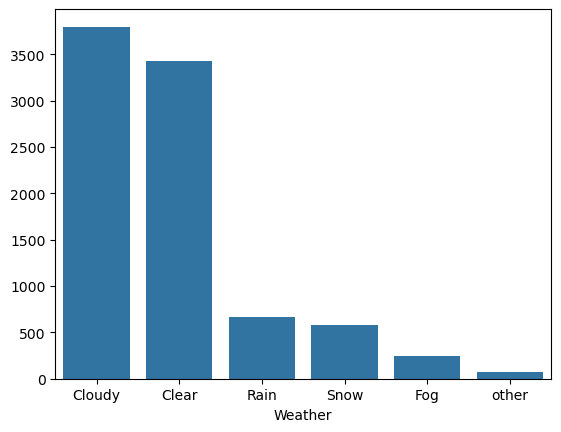

In [13]:
sns.barplot(x=c.index,y=c.values)
plt.show()

In [14]:
X=df.drop("Weather",axis=1)
y=df["Weather"]

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [17]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Clear': 0, 'Cloudy': 1, 'Fog': 2, 'Rain': 3, 'Snow': 4, 'other': 5}


In [18]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
depths = list(range(1,10)) + [None]

In [22]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,recall_score,f1_score

In [23]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [24]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [25]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [26]:
train_acc

0.652701882210079

In [27]:
test_acc

0.6174863387978142

In [28]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

In [29]:
print(conf_matrix)

[[1768  815    0    6    4    0]
 [ 888 1890    0   33   29    0]
 [   0    0   89   37   48    0]
 [  28  226    2  226   26    0]
 [  21   71    1    7  322    0]
 [   1   23    2    8   12    5]]


In [30]:
class_report = classification_report(y_train, y_train_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      2593
           1       0.62      0.67      0.64      2840
           2       0.95      0.51      0.66       174
           3       0.71      0.44      0.55       508
           4       0.73      0.76      0.75       422
           5       1.00      0.10      0.18        51

    accuracy                           0.65      6588
   macro avg       0.78      0.53      0.57      6588
weighted avg       0.66      0.65      0.65      6588



In [31]:
from sklearn.compose import ColumnTransformer


In [32]:
trf2 = ColumnTransformer([('imputed_columns', SimpleImputer(strategy='median'), [0,1,2,3,4,5])], remainder='passthrough')
trf3 = ColumnTransformer([('scale',MinMaxScaler(),[0,1,2,3,4,5])])
trf4 = DecisionTreeClassifier(max_depth=6, random_state=42)

In [33]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("imputer", trf2),
    ("scaler", trf3),
    ("model", trf4),
])

In [34]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputed_columns',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('scaler',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('model',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [39]:
y_pred_train=pipeline.predict(X_train)

In [40]:
y_pred_test=pipeline.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred_test))

Accuracy: 0.6174863387978142


In [42]:
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.652701882210079


In [45]:
import joblib
joblib.dump(pipeline, "assignment.pkl")

['assignment.pkl']